- [Introduction]
- **[Sona Section]**
- [Load data - and create two versions with night time dummy]
- [Descriptive Graphs]
    - [Time series-daily]
    - [Time series - monthly]
    - [Plot heat map for time of occurrence]
    - [Dual sided line plot for day/night]
    - [Histogram with type of crime]
    - [Pie-graph with type of crime]
    - [Histogram with type of crime by day/night]
- [Merge data with controls]
    - [Additional Regressions]
        - [Impact of Corona with line plot]
        - [Impact of Stimulus payments with line plot]
- [Merge with Brightness data]
    - [Regression for impact of night lights on B]
    - [Regression for impact of night lights on crime with controls for Poverty]
    - ? Look at effect of Portland neighbourhood special funding.
- [Use call for service data]
    - [Geographical prediction]


In [166]:
###Loading in necessary packages
#Reading in the data
import numpy as np
import pandas as pd
import seaborn as sns
#import plotly.express as px
import matplotlib.pyplot as plt
import os
import calplot #pip
import datetime

In [128]:
##Data cleaning
def clean_data():
    
   if __name__ == "__main__":

     cwd = os.getcwd()
     files = os.listdir("data")
     prefix='Crime'
     file= list(filter(lambda file: file.startswith(prefix),files))

     df = []
     for f in file:
         csv_file="data"+ "/" + f
         print(csv_file)
         df.append(pd.read_csv(csv_file))
         df_full = pd.concat(df, ignore_index=True)


     df_full.to_csv("data/crime_data", encoding='utf-8', index=False)
     data= pd.read_csv("data/crime_data")
     #Cleaning the Dates
     data['OccurDate'] = pd.to_datetime(data['OccurDate'],format='%d/%m/%Y')
     data['OccurMonth_Year']  = pd.to_datetime(data['OccurDate']).dt.to_period('M')

     to_drop = ['Address',
               'CrimeAgainst',
               'OffenseType',
               'OpenDataLat',
               'OpenDataLon',
               'OpenDataX',
               'OpenDataY',
               'ReportDate']


     data= data[data.OccurMonth_Year>"2015-06-01"]
     data= data[data.OccurMonth_Year<"2021-06-01"]

     data.drop(to_drop, inplace=True, axis=1)
     return data

clean_data=clean_data()
clean_data.head()


data/CrimeData-2015.csv
data/CrimeData-2016.csv
data/CrimeData-2017.csv
data/CrimeData-2018.csv
data/CrimeData-2019.csv
data/CrimeData-2020.csv
data/CrimeData-2021.csv


,CaseNumber,Neighborhood,OccurDate,OccurTime,OffenseCategory,OffenseCount,OccurMonth_Year
912,15-X4331944,Brentwood-Darlington,2015-07-01,138,Assault Offenses,1,2015-07
918,15-X4332622,Lloyd,2015-07-01,1230,Assault Offenses,1,2015-07
919,15-X4332748,Humboldt,2015-07-01,1315,Assault Offenses,1,2015-07
920,15-X4332811,Centennial,2015-07-01,1746,Assault Offenses,2,2015-07
921,15-X4332836,Hazelwood,2015-07-01,2134,Assault Offenses,1,2015-07


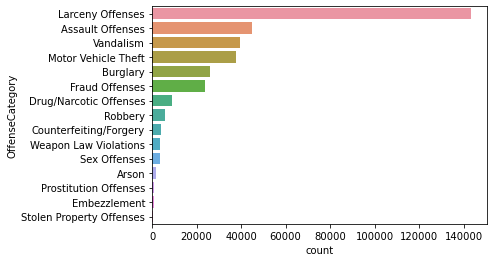

In [52]:
ax = sns.countplot(y="OffenseCategory",data=clean_data, order=clean_data.OffenseCategory.value_counts().iloc[:15].index)

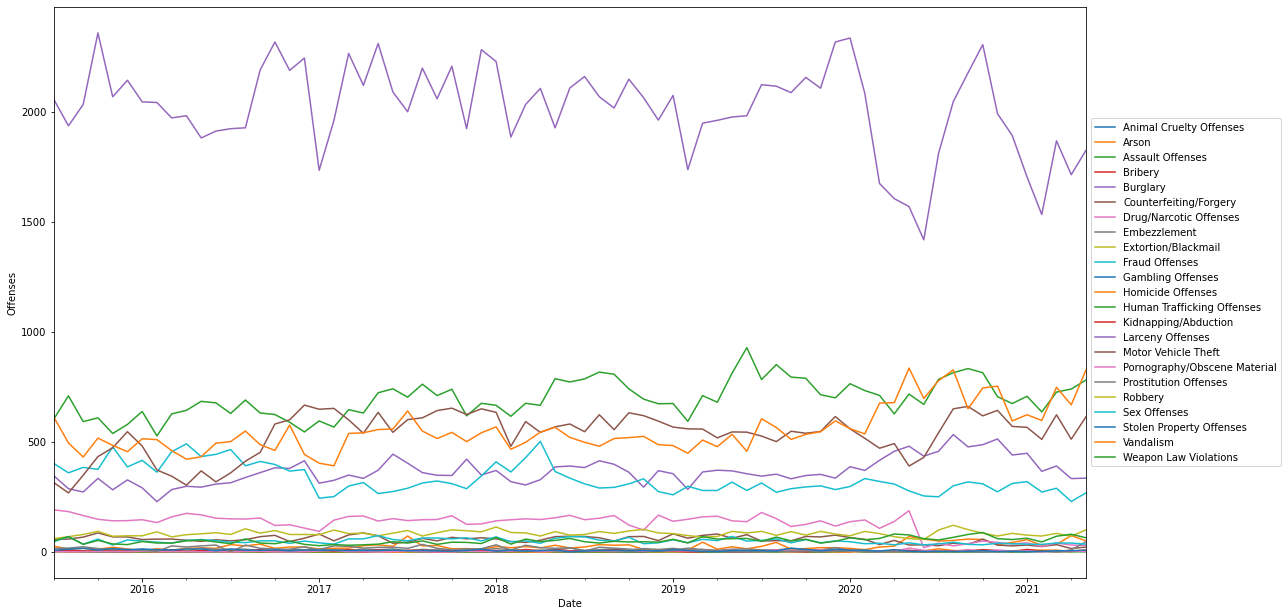

In [65]:
fig, ax = plt.subplots()

clean_data_crime=clean_data.groupby(['OccurMonth_Year','OffenseCategory']).OffenseCount.sum().reset_index()
for label, grp in clean_data_crime.groupby('OffenseCategory'):
    grp.plot(x = "OccurMonth_Year", y = "OffenseCount",ax = ax, label = label,)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    fig.set_size_inches(18.5, 10.5)
    ax.set_xlabel('Date')
    ax.set_ylabel('Offenses')

In [88]:
#clean_data is crime occurence level
#clean_data_n_month is crime occurence neightborhood level

OffenseCategory,index,Neighborhood,OccurMonth_Year,Animal Cruelty Offenses,Arson,Assault Offenses,Bribery,Burglary,Counterfeiting/Forgery,Drug/Narcotic Offenses,...,Larceny Offenses,Motor Vehicle Theft,Pornography/Obscene Material,Prostitution Offenses,Robbery,Sex Offenses,Stolen Property Offenses,Vandalism,Weapon Law Violations,Total_Offenses
0,0,Alameda,2015-07,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,3.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15.0
1,1,Alameda,2015-08,0.0,0.0,2.0,0.0,1.0,0.0,0.0,...,10.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,20.0
2,2,Alameda,2015-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0
3,3,Alameda,2015-10,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,8.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,16.0
4,4,Alameda,2015-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [410]:
#generate wide form crime level data
def convert_wide_report_time_level(clean_data):
    data_to_convert=clean_data
    df_wide= data_to_convert.groupby(['OccurMonth_Year','Neighborhood','OffenseCategory']).OffenseCount.sum().reset_index()
    df_wide= df_wide.pivot_table(index=["Neighborhood","OccurMonth_Year"], 
                    columns='OffenseCategory', 
                    values='OffenseCount').reset_index()
    df_wide= df_wide.fillna(0)
    df_wide['Total_Offenses']= df_wide.iloc[:,4:].sum(axis=1)
    df_wide=df_wide.reset_index()
    df_wide.head()
    return df_wide
  


clean_data_n_month=convert_wide_report_time_level(clean_data)
clean_data_n_month.reset_index()
clean_data_n_month.to_csv("data/crime_data_n_month", encoding='utf-8', index=False)

(<Figure size 900x244.8 with 3 Axes>,
 array([<AxesSubplot:ylabel='2018'>, <AxesSubplot:ylabel='2019'>],
       dtype=object))

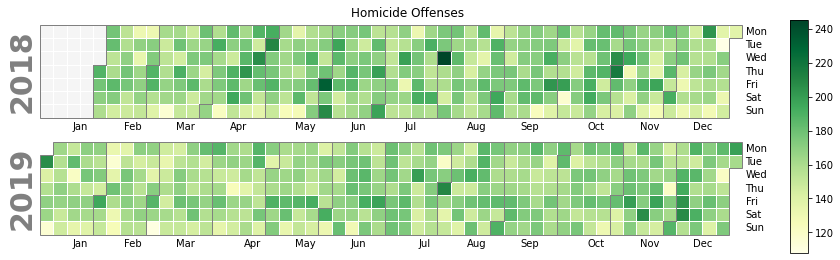

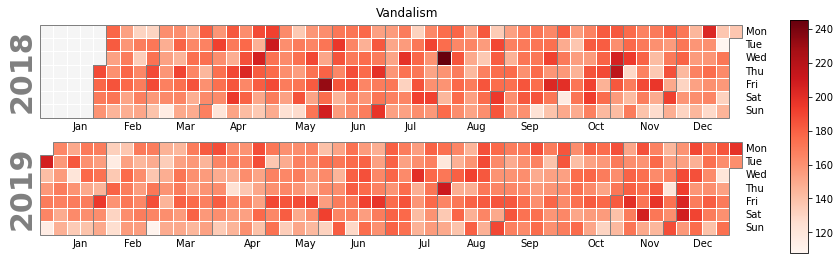

In [162]:
clean_data_calplot=clean_data.set_index('OccurDate')
clean_data_calplot= clean_data_calplot[clean_data_calplot.OccurMonth_Year>"2018-01-01"]
clean_data_calplot= clean_data_calplot[clean_data_calplot.OccurMonth_Year<"2020-01-01"]
clean_data_calplot_motor_theft= clean_data_calplot[clean_data_calplot.OffenseCategory=="Motor Vehicle Theft"]        
#calplot.calplot(clean_data_calplot['OffenseCount'])


clean_data_calplot_motor_theft= clean_data_calplot[clean_data_calplot.OffenseCategory=="Homicide Offenses"]       
calplot.calplot(clean_data_calplot['OffenseCount'], cmap='YlGn',suptitle="Homicide Offenses")


clean_data_calplot_vandalism= clean_data_calplot[clean_data_calplot.OffenseCategory=="Vandalism"]       
calplot.calplot(clean_data_calplot['OffenseCount'], cmap='Reds',suptitle="Vandalism")

In [306]:

clean_data_day_night= clean_data.groupby(['OccurTime']).OffenseCount.sum().reset_index()
clean_data_day_night['OffenseCount']  = (clean_data_day_night['OffenseCount'] /clean_data_day_night['OffenseCount'].sum()) * 100

clean_data_day_night['day_or_night'] = np.where(((clean_data_day_night['OccurTime']<700) | (clean_data_day_night['OccurTime']>2000)), 'night', 'day')
clean_data_day_night= clean_data_day_night.pivot_table(index=["OccurTime"], 
                    columns='day_or_night', 
                    values='OffenseCount').reset_index()
clean_data_day_night= clean_data_day_night.fillna(0)
clean_data_day_night['night']=-clean_data_day_night['night']
#clean_data_day_night['day_or_night'] = np.where((clean_data_day_night['OccurTime']>2000), 'night', 'day')
clean_data_day_night['night_square']=2*clean_data_day_night['night']
#clean_data_day_night.groupby(['day_or_night']).OffenseCount.sum().reset_index()


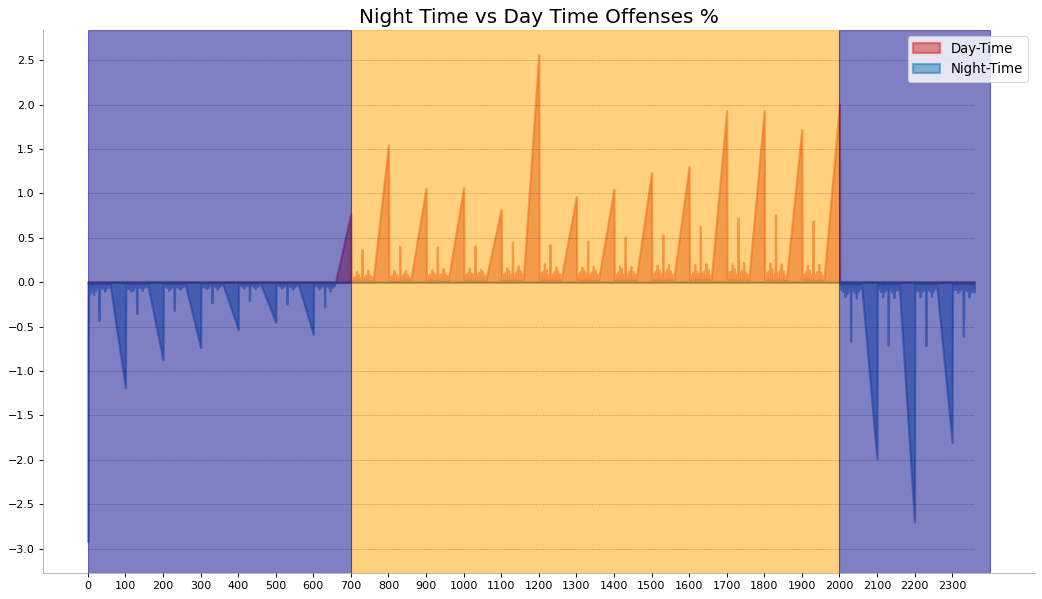

In [305]:
#datetime.datetime.strptime(clean_data_day_night['OccurTime'],'%H%M')

x = clean_data_day_night['OccurTime'].values.tolist()
y1 = clean_data_day_night['day'].values.tolist()
y2 = clean_data_day_night['night'].values.tolist()
mycolors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['Night-Time', 'Day-Time']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Night Time vs Day Time Offenses %', fontsize=18)
#ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::60], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(-3, 3, 0.5), fontsize=10)
#plt.xlim(-10, x[-1])

# Draw Tick lines  
for y in np.arange(-3, 3, 0.5):    
    plt.hlines(y, xmin=0, xmax=2359, colors='black', alpha=0.3, linestyles="--", lw=0.5)
    
ax.axvspan(700, 2000, alpha=0.5, color='orange')
ax.axvspan(0, 700, alpha=0.5, color='darkblue')
ax.axvspan(2000, 2400, alpha=0.5, color='darkblue')
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

In [374]:


clean_data_day_night= clean_data.groupby(['OccurTime','OffenseCategory']).OffenseCount.sum().reset_index()
clean_data_day_night= clean_data_day_night[(clean_data_day_night.OffenseCategory=="Motor Vehicle Theft") | (clean_data_day_night.OffenseCategory=="Assault Offenses") | (clean_data_day_night.OffenseCategory=="Prostitution Offenses")| (clean_data_day_night.OffenseCategory=="Homicide Offenses")] 



clean_data_day_night= clean_data_day_night.pivot_table(index=["OccurTime"], 
                    columns='OffenseCategory', 
                    values='OffenseCount').reset_index()

clean_data_day_night['day_or_night'] = np.where(((clean_data_day_night['OccurTime']<700) | (clean_data_day_night['OccurTime']>2000)), 'night', 'day')

#clean_data_day_night= clean_data_day_night.pivot_table(index=["OccurTime","OffenseCategory"], 
                    #columns='day_or_night', 
                    #values=['Assault Offenses','Homicide Offenses','Motor Vehicle Theft','Prostitution Offenses']).reset_index()
clean_data_day_night= clean_data_day_night.fillna(0)
offences = ['Assault Offenses','Motor Vehicle Theft','Prostitution Offenses']

for i in offences:
    clean_data_day_night[i]=(clean_data_day_night[i] /clean_data_day_night[i].sum()) * 100
    clean_data_day_night[i]=np.where(clean_data_day_night['day_or_night']=="night",-1*clean_data_day_night[i],clean_data_day_night[i])


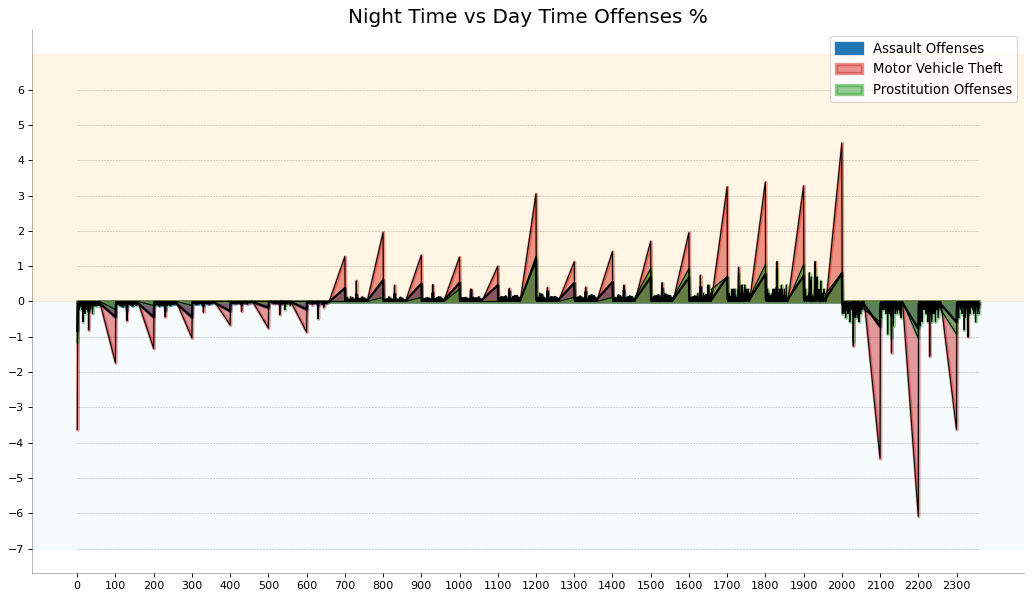

In [400]:
#datetime.datetime.strptime(clean_data_day_night['OccurTime'],'%H%M')

x = clean_data_day_night['OccurTime'].values.tolist()
y1 = clean_data_day_night['Assault Offenses'].values.tolist()
y2 = clean_data_day_night['Motor Vehicle Theft'].values.tolist()
y3 = clean_data_day_night['Prostitution Offenses'].values.tolist()

mycolors = ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['Assault Offenses', 'Motor Vehicle Theft','Prostitution Offenses']

# Draw Plot 
fig, ax = plt.subplots(1,1, figsize=(16,9), dpi= 80)
ax.plot(x, y1, label="",color='black', linewidth=2)
ax.plot(x, y2, label="",color='black', linewidth=1)
ax.plot(x, y3, label="",color='black', linewidth=1)
ax.fill_between(x, y1=y1, y2=0, label=columns[0], alpha=1, edgecolor='black',color=mycolors[0], linewidth=3)
ax.fill_between(x, y1=y2, y2=0, label=columns[1], alpha=0.5, edgecolor='black',color=mycolors[1], linewidth=3)
ax.fill_between(x, y1=y3, y2=0, label=columns[2], alpha=0.5, edgecolor='black',color=mycolors[2], linewidth=3)

# Decorations
ax.set_title('Night Time vs Day Time Offenses %', fontsize=18)
#ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::60], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(-7, 7, 1), fontsize=10)
#plt.xlim(-10, x[-1])

# Draw Tick lines  
for y in np.arange(-7, 7, 1):    
    plt.hlines(y, xmin=0, xmax=2359, colors='black', alpha=0.3, linestyles="--", lw=0.5)
    
ax.axhspan(0,7, alpha=0.1, color='orange')
ax.axhspan(0,-7, alpha=0.1, color='lightblue')
#ax.axhspan(0, 700, alpha=0.5, color='darkblue')
#ax.axvspan(2000, 2400, alpha=0.5, color='darkblue')
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

#plt.axvline(x=2000)
#plt.axvline(x=700)
plt.show()



